In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

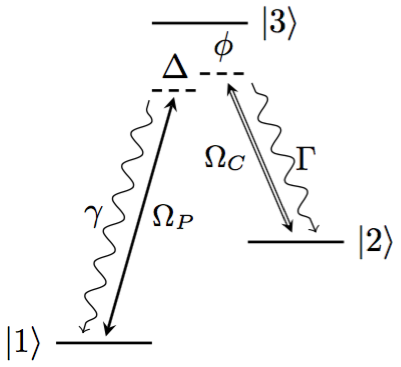

In [2]:
one, two, three = three_level_basis()
sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig13 = one * three.dag()
sig23 = two * three.dag()
sig12 = one * two.dag()

Image("fig/EIT_levels.png")

In [3]:
# Loop over the detuning Delta and generate rho and chi

# constants based on Jenkins EIT masters thesis
# It seems like the values they quote aren't right. They don't match the code.
γ = 1  # decay rate on probe transition
Γ = 1  # decay rate on control transition
γc = 0.05  # coherence decay rate (i.e. long-lived state |2>)
ΔC = 0  # control field detuning

ΩP = 0.01  # Rabi freq. for probe
ΩC = 1.0  # Rabi freq. for control



# collapse operators
c1 = np.sqrt(γ)*sig13  # 1-3 coherence decay (probe transition)
c2 = np.sqrt(Γ)*sig23  # 2-3 coherence decay (control transition)
c3 = np.sqrt(γc)*sig12  # ground state coherence decay
collapse = [c1,c2,c3]

deltalist = np.linspace(-3,3,301)
#deltalist = [1e-15]
rho_33 = []
chi = []

#probelist = np.arange(0.0,10.0,0.5)
#for ΩP in probelist:
#    ΔP = 0
#    H = -1/2*Qobj([[0,0,ΩP],[0,2*(ΔP - ΔC),ΩC],[ΩP, ΩC, 2*ΔP]])
#    rho_ss = steadystate(H,collapse)
#    rho_33.append(rho_ss[2,2])  # jenkins approach    

for ΔP in deltalist:
    H = -1/2*Qobj([[0,0,ΩP],[0,2*(ΔP - ΔC),ΩC],[ΩP, ΩC, 2*ΔP]])
    rho_ss = steadystate(H,collapse)
    # prob.append(expect(sig33.dag(),rho_ss)) # t his also works
    rho_33.append(rho_ss[2,2])  # jenkins approach
    chi.append(expect(sig13,rho_ss))

In [4]:
#plt.plot(probelist,np.real(rho_33))
#plt.title("Excited state population")
#plt.xlabel("$\Omega_p$")

In [4]:
H

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.     0.    -0.005]
 [ 0.    -3.    -0.5  ]
 [-0.005 -0.5   -3.   ]]

Text(0.5,0,'$\\Delta$')

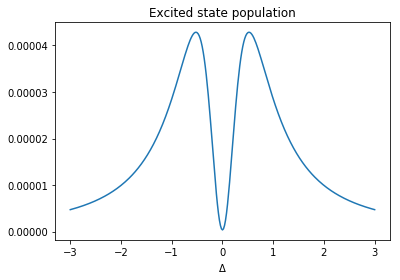

In [5]:
plt.plot(deltalist,np.real(rho_33))
plt.title("Excited state population")
plt.xlabel("$\Delta$")

Text(0.5,0,'$\\Delta$')

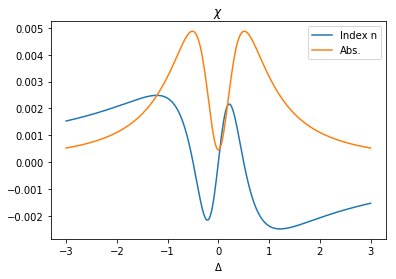

In [6]:
plt.plot(deltalist,np.real(chi),label="Index n")
plt.plot(deltalist,np.imag(chi),label="Abs.")
plt.legend()
plt.title("$\chi$")
plt.xlabel("$\Delta$")

This agrees with the standard results, and the interpretation of slow light within the EIT window.